In [42]:
# importing numpy and linear algebra library

In [43]:
import numpy as np
from numpy import dot
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d.axes3d import Axes3D
import functools
# 3D plotting



In [44]:
Quadratic = True

In [45]:
def features(X):
    if Quadratic:
        return np.column_stack([np.ones(X.shape[0]), X , X[:,0]*X[:,1], X*X])
    else:
        return np.column_stack([np.ones(X.shape[0]), X ])


def decision(X,y):
    index_1 = y > 0.5
    index_0 = y <= 0.5
    
    return X[index_0], X[index_1]
    

In [46]:
###############################################################################
# load the data
data = np.loadtxt("data2Class.txt")
print ("data.shape:", data.shape)
np.savetxt("tmp.txt", data) # save data if you want to
# split into features and labels
X, y = data[:, :2], data[:, 2]
print ("X.shape:", X.shape)
print ("y.shape:", y.shape)

data.shape: (200, 3)
X.shape: (200, 2)
y.shape: (200,)


<IPython.core.display.Javascript object>


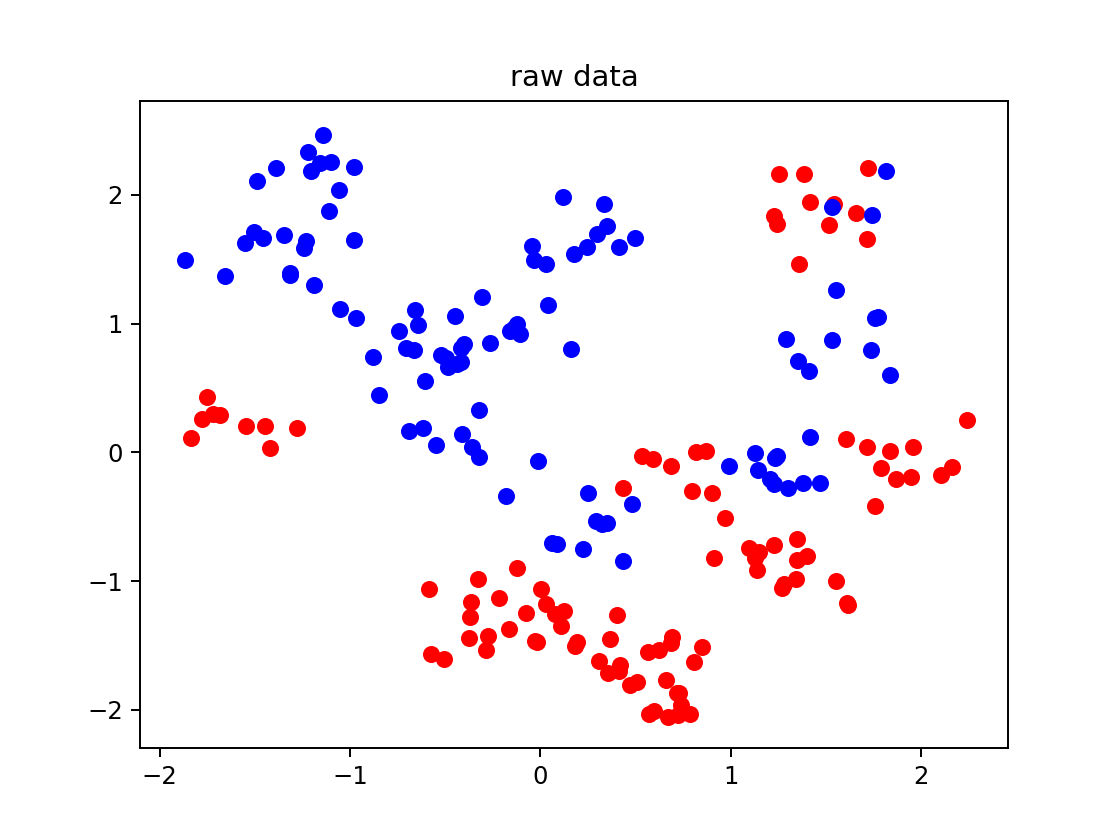

In [47]:
# 3D plotting
X0,X1 = decision(X,y)
fig = plt.figure()
ax = fig.add_subplot(111) # the projection arg is important!
ax.scatter(X0[:, 0], X0[:, 1], color="red")
ax.scatter(X1[:, 0], X1[:, 1], color="blue")
ax.set_title("raw data")
plt.draw()
# show, use plt.show() for blocking

In [48]:
def plotting(beta):
    x1 = np.linspace(-3,3,100)
    x2 = np.linspace(-3,3,100)

    X1,X2 = np.meshgrid(x1,x2)

    XX1 = beta[0] + beta[1] *X1
    if Quadratic:
        XX2 = beta[2] *X2 + beta[3]* X1*X2 +beta[4]* X1 *X1 +beta[5]* X2*X2
    else:
        XX2 = beta[2] *X2 
    fig = plt.figure()

    plt.contour(X1,X2, XX1 + XX2,[0])
    
    
        # 3D plotting
    X0,X1 = decision(X,y)
    #fig = plt.figure()
    ax = fig.add_subplot(111) # the projection arg is important!
    ax.scatter(X0[:, 0], X0[:, 1], color="red")
    ax.scatter(X1[:, 0], X1[:, 1], color="blue")
    ax.set_title("raw data")
#    plt.draw()


    plt.show()
    
    

beta= [[ 2.03229911]
 [ 0.60583993]
 [ 3.30835959]
 [-0.89837153]
 [-1.27947445]
 [-1.15505473]]


<IPython.core.display.Javascript object>


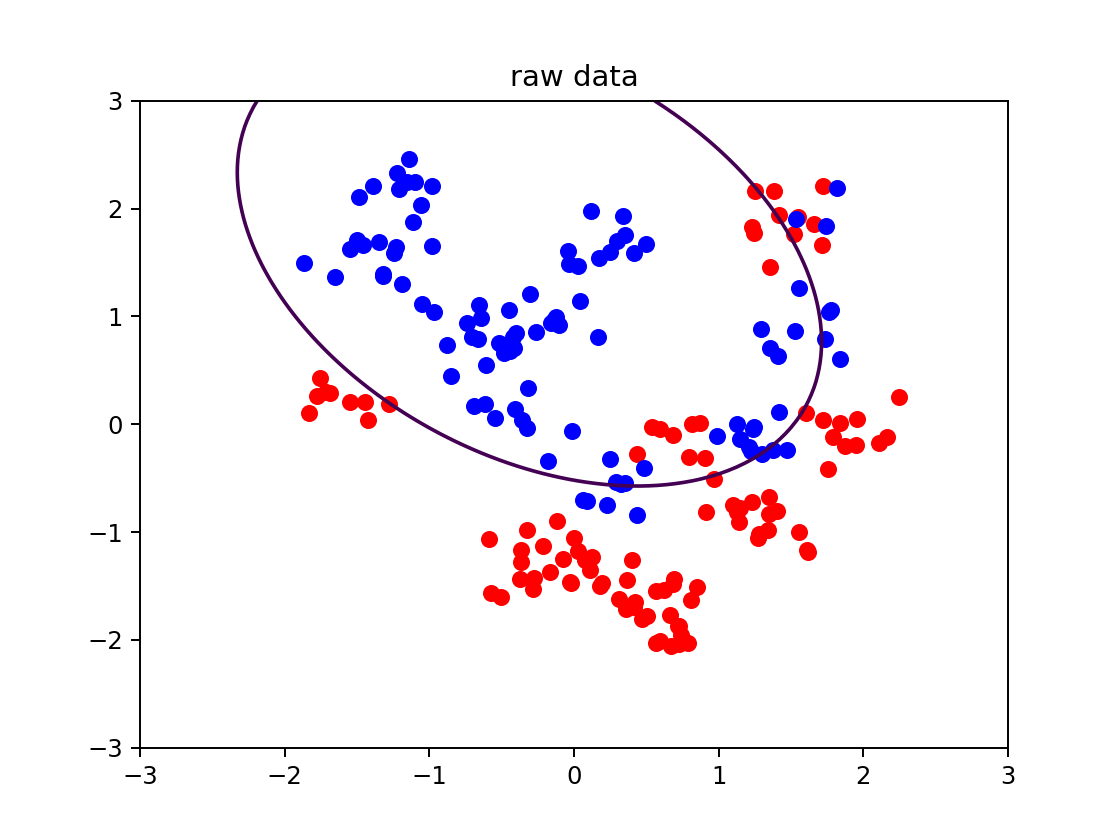

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [52]:
#using linear regression: adding a bias column into X
# prep for linear reg.

X_linear= features(X)

beta = np.zeros([X_linear.shape[1],1])

I = np.identity(X_linear.shape[1])

lamda = 0.01
alpha = 0.01
num_iterations = 100

for iter in range(num_iterations):
    # Re-compute the likelihood probability for all data points
    # This computation uses the updated beta (updated discriminant function)
    p = 1.0/(1.0+np.exp(-np.dot(X_linear,beta)))
    p=p.flatten()  
   
    # Comumputing the gradients
    grad = np.dot(X_linear.T, p-y) + 2*lamda* np.dot(I , beta).flatten()
    grad = grad.reshape(len(grad),1)
    
    # Update the model's parameter along the direction of gradients
    beta = beta - alpha*grad    
    beta=beta.reshape(len(beta),1)
    
    
# Visualize the classifier (together with data)    
print("beta=",beta)
plotting(beta)


